  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   717  100   717    0     0   6128      0 --:--:-- --:--:-- --:--:--  6128
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1975  100  1975    0     0  22191      0 --:--:-- --:--:-- --:--:-- 22191
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   120  100   120    0     0   1348      0 --:--:-- --:--:-- --:--:--  1363
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   342  100   342    0     0   3420      0 --:--:-- --:--:-- --:--:--  3420


<Figure size 432x288 with 0 Axes>

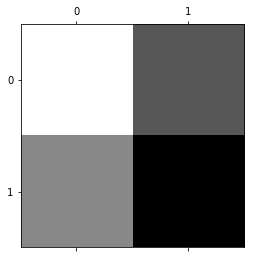

[1]
[[-0.84090916 -0.90753449 -1.31582609]
 [-0.88996388 -0.0639657   0.3850215 ]
 [ 1.7400348  -0.97926705  0.3524612 ]
 [-1.26182994  0.33442387  1.21818476]
 [-1.23210426 -0.27400303  1.58366938]]


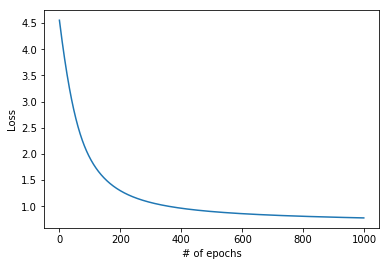

Acuuracy of the model is 0.763


In [16]:
'''
    Import Data
'''
!curl https://raw.githubusercontent.com/tm200042/496_HW_2/master/X_iris_test.csv -o X_iris_test.csv
!curl https://raw.githubusercontent.com/tm200042/496_HW_2/master/X_iris_train.csv -o X_iris_train.csv
!curl https://raw.githubusercontent.com/tm200042/496_HW_2/master/y_iris_test.csv -o y_iris_test.csv 
!curl https://raw.githubusercontent.com/tm200042/496_HW_2/master/y_iris_train.csv -o y_iris_train.csv
import numpy as np #arry, matrix
import pandas as pd #data processing
import matplotlib.pyplot as plt 
%matplotlib inline


'''
    Read Data
'''
def read_data(feature_file,label_file):
    X_df = pd.read_csv(feature_file)
    y_df = pd.read_csv(label_file)
    #extract dta from the data frame
    X = X_df.values
    y = y_df.values 
    return X,y

X_train, y_train = read_data('X_iris_train.csv', 'y_iris_train.csv')
X_test, y_test = read_data('X_iris_test.csv', 'y_iris_test.csv')

'''
    Plot
'''
def plot_digit(feature_vector): 
    plt.gray() 
    plt.matshow(feature_vector.reshape(2,2))
    plt.show()
plot_digit(X_train[7])
print(y_train[7])

'''
    normalize the features
    Using normal distribution
'''
def get_mean_variance(X):
    mean = np.mean(X, axis=0) # axis=0: taking means along the
    # vertical line (column)
    # (sum(x_i-\mu)^2)/N
    X_temp = X - mean #
    X_temp_entrypointwise = X_temp*X_temp
    variance = np.mean(X_temp_entrypointwise, axis=0) #axis=0: 
    # taking means along the vertical line (column)
    return mean, variance    
    
def normalize_features(X_train, X_test):
    mean, variance = get_mean_variance(X_train)
    variance += 1e-15
    ''' transform the feature '''
    X_train_norm_O = (X_train - mean)/np.sqrt(variance)
    #math.sqrt doesnot work for numpy
    X_test_norm_O = (X_test - mean)/np.sqrt(variance)
    return X_train_norm_O, X_test_norm_O

X_train_norm, X_test_norm = normalize_features(X_train, X_test)


'''
    Add Bias
'''
def add_column_one(X):
    '''
         convert X -> [1 X]
    '''
    # add  column of ones
    ones = np.ones(X.shape[0])
    ones = ones.reshape(-1, 1)
    X_new = np.append(ones, X, axis=1)
    return X_new

X_train_norm_new = add_column_one(X_train_norm)
X_test_norm_new = add_column_one(X_test_norm)

'''
    Predictor (sigmond function)
'''
def predictor(X_0,c):
    return 1.0/(1.0 + np.exp(-np.dot(X_0,c)))

'''
    Loss Function
'''
def loss(X,Y,c):
    '''Loss Function predictor(X,c)=y_pred'''
    loss = np.sum(np.multiply(-Y,np.log(predictor(X,c)))-np.multiply(1 - Y, np.log(1 - predictor(X, c))))/float(X.shape[0])
    return loss


'''
    Gradient Descent
'''
def gradient_descent(X, Y, learning_rate, epochs):
    loss_history = [0]*epochs
    c_dim = X.shape[1]
    n_samples = X.shape[0]
    c = np.ones((c_dim, 1))
    for i in range(epochs):
        XT = X.T
        gradient = 2.0*np.matmul( XT, predictor(X, c) - Y)
        c = c -learning_rate*gradient
        loss_history[i] = loss(X,Y, c)
    return c, loss_history

def plot_loss(Loss):
    import matplotlib  # import package
    import matplotlib.pyplot as plt # import library pytlot and change its name to plt
    %matplotlib inline  
    plt.xlabel('# of epochs')
    plt.ylabel('Loss')
    plt.plot(Loss)
    plt.show();  
    
    
def  one_hot_encoder(y_train):
    y_max = np.max(y_train)
    y_min = np.min(y_train)
    n = y_max - y_min +1
    yy = np.zeros((y_train.shape[0],n))
    for i in range(y_train.shape[0]):
        yy[i,y_train[i]]=1
    return yy
    
Y_train= one_hot_encoder(y_train)
Y_test  = one_hot_encoder(y_test)




'''
    Training
'''
c, loss_history = gradient_descent(X_train_norm_new, Y_train, 0.0001, 1000)
print(c)
plot_loss(loss_history)

def one_hot_decoder(y_test):
    y_test_real = y_test.argmax(axis = 1)
    return y_test_real.reshape(-1,1)

y_pred = predictor(X_test_norm_new, c)
Y_pred = one_hot_decoder(y_pred)
'''
    Accuracy
'''
def accuracy(y_pred, y_exact):
    p = np.array(y_pred == y_exact, dtype = int)
    return np.sum(p)/float(len(y_exact))

print('Acuuracy of the model is %.3f' % accuracy(Y_pred, y_test))

